In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim

from vanilla_rnn import VanillaRNN
from dataset import PalindromeDataset

In [5]:
def train(input_length, input_dim=10, num_classes=10, num_hidden=128, batch_size=128,
          learning_rate=0.001, train_steps=200, max_norm=10.0):
    
    device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
    model = VanillaRNN(input_length, input_dim, num_hidden, num_classes).to(device)

    dataset = PalindromeDataset(input_length+1)
    data_loader = data.DataLoader(dataset, batch_size, num_workers=0)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)

    for step, (batch_inputs, batch_targets) in enumerate(data_loader):
        model.train()
        batch_inputs = batch_inputs.to(device).long()
        batch_inputs = torch.nn.functional.one_hot(batch_inputs, input_dim).float()
        batch_targets = batch_targets.to(device).long()
        logit = model(batch_inputs, batch_first=True)  
        loss = criterion(logit, batch_targets)
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=max_norm)
        optimizer.step()

        loss = loss.item()
        accuracy = (logit.argmax(dim=1) == batch_targets).float().mean().item()
        if step % 10 == 0:
            print(f"Step {step}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")

        if step >= train_steps:
            break

    print('Done training.')
    return accuracy

In [6]:
accuracies = []
for input_length in [1, 2, 3, 4, 5, 10, 15, 20, 25, 30]:
    print(f"\nTraining for input length: {input_length}")
    acc = train(input_length=input_length)
    accuracies.append((input_length, acc))


Training for input length: 1
Step 0: Loss = 2.3387, Accuracy = 0.0938
Step 10: Loss = 1.2632, Accuracy = 1.0000
Step 20: Loss = 0.7728, Accuracy = 1.0000
Step 30: Loss = 0.4759, Accuracy = 1.0000
Step 40: Loss = 0.3150, Accuracy = 1.0000
Step 50: Loss = 0.2181, Accuracy = 1.0000
Step 60: Loss = 0.1589, Accuracy = 1.0000
Step 70: Loss = 0.1243, Accuracy = 1.0000
Step 80: Loss = 0.0996, Accuracy = 1.0000
Step 90: Loss = 0.0794, Accuracy = 1.0000
Step 100: Loss = 0.0658, Accuracy = 1.0000
Step 110: Loss = 0.0549, Accuracy = 1.0000
Step 120: Loss = 0.0466, Accuracy = 1.0000
Step 130: Loss = 0.0409, Accuracy = 1.0000
Step 140: Loss = 0.0355, Accuracy = 1.0000
Step 150: Loss = 0.0308, Accuracy = 1.0000
Step 160: Loss = 0.0274, Accuracy = 1.0000
Step 170: Loss = 0.0246, Accuracy = 1.0000
Step 180: Loss = 0.0221, Accuracy = 1.0000
Step 190: Loss = 0.0195, Accuracy = 1.0000
Step 200: Loss = 0.0175, Accuracy = 1.0000
Done training.

Training for input length: 2
Step 0: Loss = 2.2899, Accuracy =

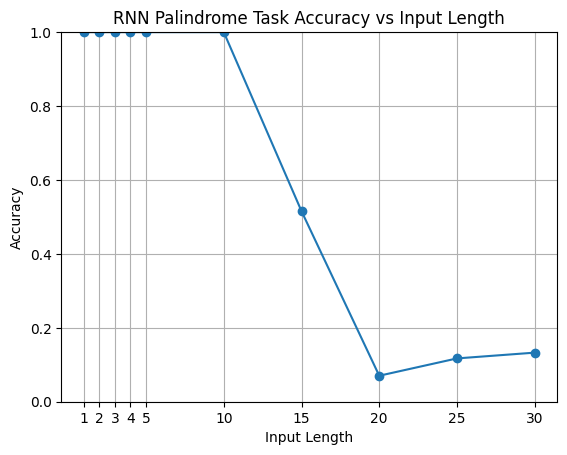

In [7]:
import matplotlib.pyplot as plt
input_lengths, acc_values = zip(*accuracies)
plt.plot(input_lengths, acc_values, marker='o')
plt.title('RNN Palindrome Task Accuracy vs Input Length')
plt.xlabel('Input Length')
plt.ylabel('Accuracy')
plt.xticks(input_lengths)
plt.ylim(0, 1)
plt.grid()
plt.show()